## 1. Introduction
In this notebook, I have built 4 different mathemtical models to predict EPL match results based on the past performances of the teams. The curated dataset spans 2022-2023 English Premier League (EPL) season, encompassing all 380 matches, as well as every match of the ongoing 2023-2024 season, up until 31st October 2023. Data has been pre-processed in the Excel file `EPL Analysis.xlsx`. Here, we will mainly model and visualize the predictions using heatmaps and Poisson distribution graphs.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Load the data
file_path = 'data/Strengths.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      20 non-null     object 
 1   Home_Attack_Strength      20 non-null     float64
 2   Home_Defense_Strength     20 non-null     float64
 3   Away_Attack_Strength      20 non-null     float64
 4   Away_Defense_Strength     20 non-null     float64
 5   Home_Possession_Strength  20 non-null     float64
 6   Away_Possession_Strength  20 non-null     float64
 7   Avg_Home_Goals            20 non-null     float64
 8   Avg_Away_Goals            20 non-null     float64
 9   Avg_Goals_Against_Home    20 non-null     float64
 10  Avg_Goals_Against_Away    20 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.8+ KB


In [23]:
data.head()

,Team,Home_Attack_Strength,Home_Defense_Strength,Away_Attack_Strength,Away_Defense_Strength,Home_Possession_Strength,Away_Possession_Strength,Avg_Home_Goals,Avg_Away_Goals,Avg_Goals_Against_Home,Avg_Goals_Against_Away
0,Arsenal,1.690592,0.930835,1.470761,0.523112,1.406883,1.177634,2.730769,1.791667,1.230769,0.875000
1,Aston Villa,1.386761,0.786556,0.788054,0.884807,1.122965,1.048446,2.240000,0.960000,1.040000,1.480000
2,Bournemouth,0.619090,1.105367,0.752482,1.494606,0.961755,0.807226,1.000000,0.916667,1.461538,2.500000
3,Brentford,1.163889,0.847060,0.985068,0.836980,0.987739,0.954582,1.880000,1.200000,1.120000,1.400000
4,Brighton,1.238180,0.901747,1.539168,1.071134,1.278674,1.172386,2.000000,1.875000,1.192308,1.791667


### 1.1 Parameters used in Modelling

The image below shows the parameters defined beforehand in `EPL Analysis.xlsx`. They will be used throughout different models in this notbook.

<img src="images/parameters.png" alt="Parameters" width="400">

### 1.2 Poisson Distribution

As mentioned earlier, we use Poisson Distribution to predict the match outcome. To facilitate such prediction, we will have to denote - 𝑥 an event's realisation, and 𝜆 the rate at which an event occurs.

<img src="images/lambdas.png" alt="Lambda" width="500">

With these defined, we will set up our Poisson Distribution formula as below:

<img src="images/poisson_formula.png" alt="Poisson Formula" width="350">

## 2. Modelling & Visualisation

In the following, we have picked "Man City" (as Home Team) and "Tottenham (as Away Team) as the two teams playing against each other for all the four models to see which one render the best result.

In [24]:
# Set home and away teams
home_team = "Man City"
away_team = "Tottenham"

# Home Team : Man City
home_team_df = data[data['Team'] == home_team]

# Away Team : Tottenham
away_team_df = data[data['Team'] == away_team]

In [25]:
class Model:
    def __init__(self, home_goal_expectancy, away_goal_expectancy, name):
        self.Home_Goal_Expectancy = home_goal_expectancy
        self.Away_Goal_Expectancy = away_goal_expectancy
        self.name = name

    def display_expectancies(self):
        print(f"Home Goal Expectancy: {self.Home_Goal_Expectancy}")
        print(f"Away Goal Expectancy: {self.Away_Goal_Expectancy}")

### 2.1 Formulae of Models

#### Model 1

<img src="images/model_1.png" alt="Model 1" width="500">

In [26]:
# Calculate Model 1 Goal Expectancy
m1_Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0]  / away_team_df['Away_Possession_Strength'].values[0]
m1_Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0]  / home_team_df['Home_Possession_Strength'].values[0]

#### Model 2

<img src="images/model_2.png" alt="Model 2" width="500">

In [27]:
# Calculate Model 2 Goal Expectancy
m2_Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0] 
m2_Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0] 

#### Model 3

<img src="images/model_3.png" alt="Model 3" width="500">

In [28]:
# Calculate Model 3 Goal Expectancy
m3_Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0] * away_team_df['Avg_Goals_Against_Away'].values[0] / away_team_df['Away_Possession_Strength'].values[0]
m3_Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0] * home_team_df['Avg_Goals_Against_Home'].values[0]  / home_team_df['Home_Possession_Strength'].values[0]

#### Model 4

<img src="images/model_4.png" alt="Model 4" width="500">

In [29]:
# Calculate Model 4 Goal Expectancy
m4_Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0] /( away_team_df['Avg_Goals_Against_Away'].values[0] * away_team_df['Away_Possession_Strength'].values[0])
m4_Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0] /( home_team_df['Avg_Goals_Against_Home'].values[0]  * home_team_df['Home_Possession_Strength'].values[0])

In [30]:
m1 = Model(m1_Home_Goal_Expectancy,m1_Away_Goal_Expectancy,"m1")
m2 = Model(m2_Home_Goal_Expectancy,m2_Away_Goal_Expectancy,"m2")
m3 = Model(m3_Home_Goal_Expectancy,m3_Away_Goal_Expectancy,"m3")
m4 = Model(m4_Home_Goal_Expectancy,m4_Away_Goal_Expectancy,"m4")

## 2.2 Visulisation

In this part, we will visualise the results using heat map and poisson distribution graph.

In [31]:
# Define the function to plot heat map
def PlotHeatMap(model):

    print(f"Model {model.name[-1]} Heat Map Result")
    plt.ioff()

    n = 11  # Number of rows
    m = 11  # Number of columns

    # Create an empty data matrix
    data_matrix = np.zeros((n, m))

    # Fill the data matrix with the formula
    for i in range(n):
        for j in range(m):
            data_matrix[i, j] = ((np.exp(-model.Home_Goal_Expectancy) * (model.Home_Goal_Expectancy ** i) / np.math.factorial(i)))*(np.exp(-model.Away_Goal_Expectancy) * (model.Away_Goal_Expectancy ** j) / np.math.factorial(j))*100

    # Plot the matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    # cmap = plt.cm.get_cmap('coolwarm')
    cmap = plt.colormaps['coolwarm']
    cax = ax.matshow(data_matrix, cmap=cmap)
    colorbar = fig.colorbar(cax)
    colorbar.set_label('Probability (%) of the Match Outcome', fontsize=14, labelpad=12)
    for i in range(len(data_matrix)):
        for j in range(len(data_matrix[0])):
            ax.annotate(f"{data_matrix[i][j]:.2f}", (j, i), color='black', ha='center', va='center')
            
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(f'Away Goals ({away_team})', fontsize=14, labelpad=12)
    ax.set_ylabel(f'Home Goals ({home_team})', fontsize=14)

    title = ax.set_title(f'{home_team} vs {away_team} Distribution Matrix', fontsize=14, pad=12, weight='bold')

    plt.subplots_adjust(top=0.6, bottom=0.1)

    # Save the plot
    plt.savefig(f'output/heatmap_{model.name}_{home_team}_{away_team}.jpg', format='jpg', dpi=300)

    # Show the plot
    plt.show()

    plt.close()

    Probability_Home_Team_Win = 0
    Probability_Away_Team_Win = 0
    Probability_Draw = 0
    Most_fav_score = ""
    predicted_score = 0
    Home_team = home_team_df["Team"].values[0]
    Away_team = away_team_df["Team"].values[0]
    for i in range(data_matrix.shape[0]):
        for j in range(data_matrix.shape[1]):
            if data_matrix[i][j]>predicted_score:
                predicted_score = data_matrix[i][j]
                Most_fav_score = str(i)+"-"+str(j)
            if i>j:
                Probability_Home_Team_Win += data_matrix[i][j]
            elif i<j:
                Probability_Away_Team_Win += data_matrix[i][j]
            else :
                Probability_Draw += data_matrix[i][j]
    print(f"Home Team : {Home_team}, Winning Chances : {round(Probability_Home_Team_Win,2)}%")
    print(f"\nAway Team : {Away_team}, Winning Chances {round(Probability_Away_Team_Win,2)}%")
    print(f"\nDraw Chances : {round(Probability_Draw,2)}%")
    print(f"\nMost likely to happen score : {Most_fav_score}")

Model 3 Heat Map Result


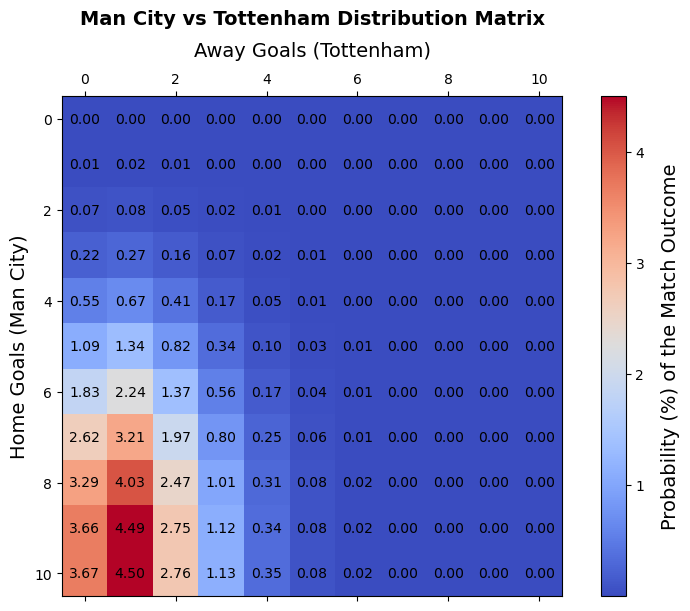

Home Team : Man City, Winning Chances : 57.63%

Away Team : Tottenham, Winning Chances 0.1%

Draw Chances : 0.22%

Most likely to happen score : 10-1


In [32]:
# PlotHeatMap(m1)
# PlotHeatMap(m2)
PlotHeatMap(m3)
# PlotHeatMap(m4)

In [33]:
# Define the function to plot poisson distribution
def PlotPoissonGraph(model):

    print(f"Model {model.name[-1]} Poisson Distribution Result")
    plt.ioff()

    # Set the parameters for the Poisson distributions (mean values)
    lambda_home = model.Home_Goal_Expectancy
    lambda_away = model.Away_Goal_Expectancy

    lambda_home_round = round(lambda_home, 3)
    lambda_away_round = round(lambda_away, 3)

    # Generate values for x (number of events) from 0 to 20
    x = np.arange(0, 15)

    # Set the width of the bars
    bar_width = 0.3
    bar_interval = 0.4

    # Set the overall size of the plot
    fig = plt.figure(figsize=(8, 5))

    # Calculate the corresponding Poisson probabilities for each distribution
    poisson_probabilities1 = poisson.pmf(x, lambda_home)
    poisson_probabilities2 = poisson.pmf(x, lambda_away)

    # Calculate the probability density function (pdf) for each distribution
    poisson_pdf1 = poisson.pmf(x, lambda_home)
    poisson_pdf2 = poisson.pmf(x, lambda_away)

    # Plot the Poisson distributions (bar plot)
    plt.bar(x - bar_width/2, poisson_probabilities1, width=bar_width, label=f'{home_team} Poisson (λ≈{lambda_home_round})', color='lightskyblue', alpha=0.7)
    plt.bar(x + bar_width/2, poisson_probabilities2, width=bar_width, label=f'{away_team} Poisson (λ≈{lambda_away_round})', color='navy', alpha=0.7)

    # Plot the Poisson distributions (pdf curve)
    plt.plot(x, poisson_pdf1, color='lightskyblue', linestyle='-', marker='o', markersize=3, label=f'{home_team} Poisson PDF (λ≈{lambda_home_round})')
    plt.plot(x, poisson_pdf2, color='navy', linestyle='-', marker='o', markersize=3, label=f'{away_team} Poisson PDF (λ≈{lambda_away_round})')

    # Add labels and title
    plt.xlabel('Number of Goals', fontsize=14)
    plt.ylabel('Probability', fontsize=14, labelpad=10)
    plt.title(f'{home_team} vs {away_team} Poisson Distribution', fontsize=14, weight='bold', pad=12)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig(f'output/poisson_{model.name}_{home_team}_{away_team}.png', format='png', dpi=300)
    plt.close()

Model 1 Poisson Distribution Result


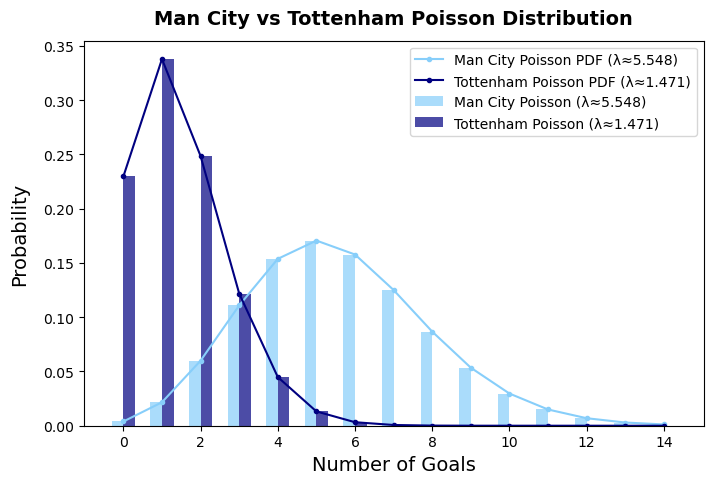

Model 2 Poisson Distribution Result


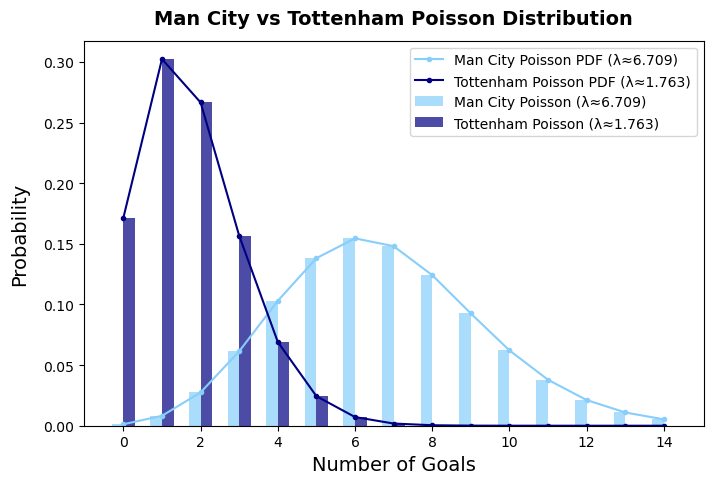

Model 3 Poisson Distribution Result


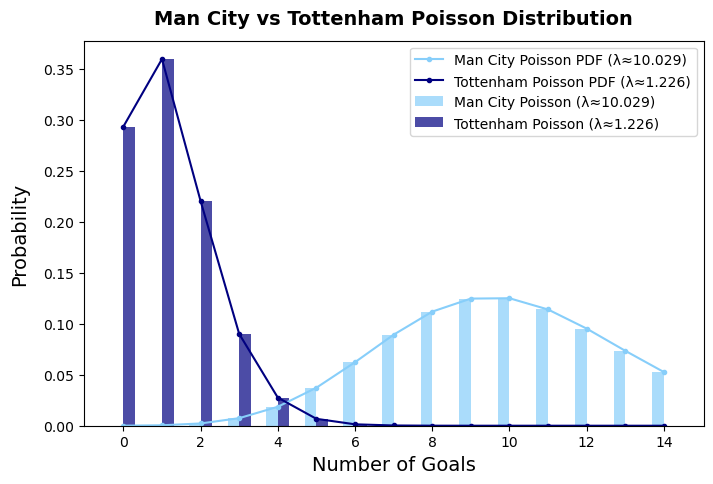

Model 4 Poisson Distribution Result


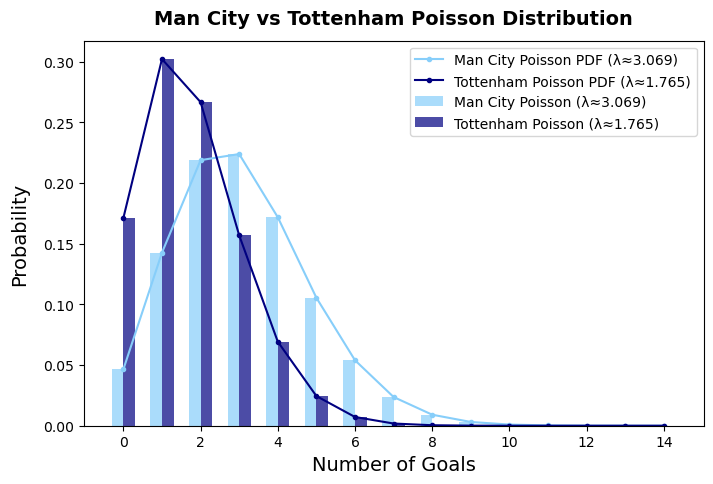

In [34]:
PlotPoissonGraph(m1)
PlotPoissonGraph(m2)
PlotPoissonGraph(m3)
PlotPoissonGraph(m4)

## 2.3 Customization Functions

In this part, we will define a function to take in "Home Team", "Away Team" and "Model" to generate match predictions.

In [35]:
# Modify the previous heat map function
def PlotHeatMap(model, home_team, away_team):
    
    plt.ioff()

    n = 11  # Number of rows
    m = 11  # Number of columns

    # Create an empty data matrix
    data_matrix = np.zeros((n, m))

    # Fill the data matrix with the formula
    for i in range(n):
        for j in range(m):
            data_matrix[i, j] = ((np.exp(-model.Home_Goal_Expectancy) * (model.Home_Goal_Expectancy ** i) / np.math.factorial(i)))*(np.exp(-model.Away_Goal_Expectancy) * (model.Away_Goal_Expectancy ** j) / np.math.factorial(j))*100

    # Plot the matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    # cmap = plt.cm.get_cmap('coolwarm')
    cmap = plt.colormaps['coolwarm']
    cax = ax.matshow(data_matrix, cmap=cmap)
    colorbar = fig.colorbar(cax)
    colorbar.set_label('Probability (%) of the Match Outcome', fontsize=14, labelpad=12)
    for i in range(len(data_matrix)):
        for j in range(len(data_matrix[0])):
            ax.annotate(f"{data_matrix[i][j]:.2f}", (j, i), color='black', ha='center', va='center')
            
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(f'Away Goals ({away_team})', fontsize=14, labelpad=12)
    ax.set_ylabel(f'Home Goals ({home_team})', fontsize=14)

    title = ax.set_title(f'{home_team} vs {away_team} Distribution Matrix', fontsize=14, pad=12, weight='bold')

    plt.subplots_adjust(top=0.6, bottom=0.1)

    # Save the plot
    plt.savefig(f'output/heatmap_{model.name}_{home_team}_{away_team}.jpg', format='jpg', dpi=300)

    # Show the plot
    plt.show()

    plt.close()

    Probability_Home_Team_Win = 0
    Probability_Away_Team_Win = 0
    Probability_Draw = 0
    Most_fav_score = ""
    predicted_score = 0
    Home_team = home_team_df["Team"].values[0]
    Away_team = away_team_df["Team"].values[0]
    for i in range(data_matrix.shape[0]):
        for j in range(data_matrix.shape[1]):
            if data_matrix[i][j]>predicted_score:
                predicted_score = data_matrix[i][j]
                Most_fav_score = str(i)+"-"+str(j)
            if i>j:
                Probability_Home_Team_Win += data_matrix[i][j]
            elif i<j:
                Probability_Away_Team_Win += data_matrix[i][j]
            else :
                Probability_Draw += data_matrix[i][j]
    print(f"Home Team : {Home_team}, Winning Chances : {round(Probability_Home_Team_Win,2)}%")
    print(f"\nAway Team : {Away_team}, Winning Chances {round(Probability_Away_Team_Win,2)}%")
    print(f"\nDraw Chances : {round(Probability_Draw,2)}%")
    print(f"\nMost likely to happen score : {Most_fav_score}")

In [36]:
# Modify the previous poisson function
def PlotPoissonGraph(model, home_team, away_team):

    plt.ioff()

    # Set the parameters for the Poisson distributions (mean values)
    lambda_home = model.Home_Goal_Expectancy
    lambda_away = model.Away_Goal_Expectancy

    lambda_home_round = round(lambda_home, 3)
    lambda_away_round = round(lambda_away, 3)

    # Generate values for x (number of events) from 0 to 20
    x = np.arange(0, 15)

    # Set the width of the bars
    bar_width = 0.3
    bar_interval = 0.4

    # Set the overall size of the plot
    fig = plt.figure(figsize=(8, 5))

    # Calculate the corresponding Poisson probabilities for each distribution
    poisson_probabilities1 = poisson.pmf(x, lambda_home)
    poisson_probabilities2 = poisson.pmf(x, lambda_away)

    # Calculate the probability density function (pdf) for each distribution
    poisson_pdf1 = poisson.pmf(x, lambda_home)
    poisson_pdf2 = poisson.pmf(x, lambda_away)

    # Plot the Poisson distributions (bar plot)
    plt.bar(x - bar_width/2, poisson_probabilities1, width=bar_width, label=f'{home_team} Poisson (λ≈{lambda_home_round})', color='lightskyblue', alpha=0.7)
    plt.bar(x + bar_width/2, poisson_probabilities2, width=bar_width, label=f'{away_team} Poisson (λ≈{lambda_away_round})', color='navy', alpha=0.7)

    # Plot the Poisson distributions (pdf curve)
    plt.plot(x, poisson_pdf1, color='lightskyblue', linestyle='-', marker='o', markersize=3, label=f'{home_team} Poisson PDF (λ≈{lambda_home_round})')
    plt.plot(x, poisson_pdf2, color='navy', linestyle='-', marker='o', markersize=3, label=f'{away_team} Poisson PDF (λ≈{lambda_away_round})')

    # Add labels and title
    plt.xlabel('Number of Goals', fontsize=14)
    plt.ylabel('Probability', fontsize=14, labelpad=10)
    plt.title(f'{home_team} vs {away_team} Poisson Distribution', fontsize=14, weight='bold', pad=12)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig(f'output/poisson_{model.name}_{home_team}_{away_team}.png', format='png', dpi=300)
    plt.close()

In [37]:
# Define the predict result function
def PredictResult(home_team, away_team, model):
    
    try:
        home_team_df = data[data["Team"] == home_team]
        away_team_df = data[data["Team"] == away_team]
        if home_team_df.empty or away_team_df.empty:
            raise ValueError("Wrong team names.")
        
        if model == "m1":
            Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0]  / away_team_df['Away_Possession_Strength'].values[0]
            Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0]  / home_team_df['Home_Possession_Strength'].values[0]
        elif model == "m2":
            Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0] 
            Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0] 
        elif model == "m3":
            Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0] * away_team_df['Avg_Goals_Against_Away'].values[0] / away_team_df['Away_Possession_Strength'].values[0]
            Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0] * home_team_df['Avg_Goals_Against_Home'].values[0]  / home_team_df['Home_Possession_Strength'].values[0]
        elif model == "m4":
            Home_Goal_Expectancy = home_team_df['Home_Attack_Strength'].values[0] * away_team_df['Away_Defense_Strength'].values[0] * home_team_df['Avg_Home_Goals'].values[0] /( away_team_df['Avg_Goals_Against_Away'].values[0] * away_team_df['Away_Possession_Strength'].values[0])
            Away_Goal_Expectancy = away_team_df['Away_Attack_Strength'].values[0] * home_team_df['Home_Defense_Strength'].values[0] * away_team_df['Avg_Away_Goals'].values[0] /( home_team_df['Avg_Goals_Against_Home'].values[0]  * home_team_df['Home_Possession_Strength'].values[0])
        else:
            raise ValueError("Wrong model names.")
        finalmodel = Model(Home_Goal_Expectancy,Away_Goal_Expectancy,model)
        
    except ValueError as ve:
        print(ve)
    
    print(f"Model {model[-1]} Result: {home_team} vs {away_team}")
    PlotHeatMap(finalmodel, home_team, away_team)
    PlotPoissonGraph(finalmodel, home_team, away_team)
    

In [38]:
print("Here is the list of teams you can pick!")
print(data["Team"],"\n")

Here is the list of teams you can pick!
0              Arsenal
1          Aston Villa
2          Bournemouth
3            Brentford
4             Brighton
5              Burnley
6              Chelsea
7       Crystal Palace
8              Everton
9               Fulham
10           Liverpool
11               Luton
12            Man City
13          Man United
14           Newcastle
15       Nott'm Forest
16    Sheffield United
17           Tottenham
18            West Ham
19              Wolves
Name: Team, dtype: object 



Model 4 Result: Wolves vs West Ham


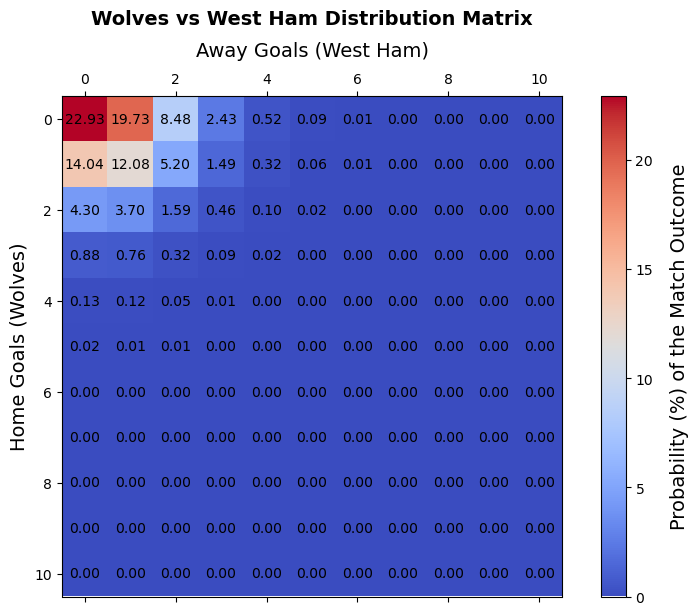

Home Team : Man City, Winning Chances : 24.36%

Away Team : Tottenham, Winning Chances 38.94%

Draw Chances : 36.7%

Most likely to happen score : 0-0


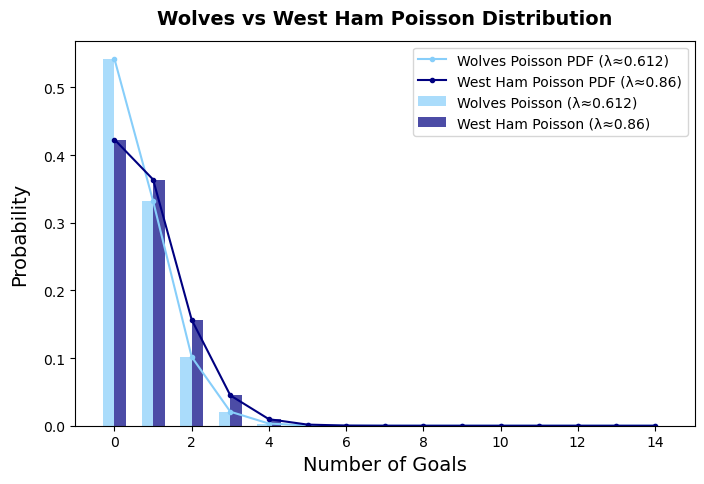

In [39]:
# Try out the function
PredictResult("Wolves","West Ham","m4")